In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import json
import os
from pkg_resources import parse_version

%matplotlib inline

In [52]:
executions_df = pd.read_json('agm_data.json')

In [78]:
def get_times_for_execution(index, df, call_type):
    """ call_type values can be 'list', 'detail', 'head' """
    timestamp = df.time[index]
    version = df.version[index]
    ipaddress = df.ipaddress[index]
    endpoints = [item['endpoint'] for item in df.tests[index][call_type]]
    exec_li = df.tests[index][call_type]
    # We may change the amount of iterations, in which case if there is any non-uniformity in iterations across
    # executions, we will get an index error
    iterations_count = len(exec_li[0]['times'])
    
    times_li = list()
    for endpoint_i, endpoint in enumerate(endpoints):
        for i in range(0, iterations_count):
            time = exec_li[endpoint_i]['times'][i]
            current_iter = {'timestamp': timestamp, 'version': version, 'endpoint': endpoint,
                            'time': time, 'ipaddress': ipaddress, 'call_type': call_type}
            times_li.append(current_iter)
    return pd.DataFrame(times_li)
        
def get_times_for_all_executions(df, call_type):
    total_executions = len(df.tests)
    execution_dfs = list()
    for i in range(0, total_executions):
        execution_dfs.append(get_times_for_execution(i, df, call_type))
    return pd.concat(execution_dfs).reset_index(drop=True)

In [132]:
def combine(df):
    combo = [get_times_for_all_executions(df=df, call_type='list'), get_times_for_all_executions(df=df, call_type='detail'), get_times_for_all_executions(df=df, call_type='head')]
    combo = pd.concat(combo)
    return combo.reset_index(drop=True)

In [146]:
def get_last_two_versions(df):
    """
    takes a pandas dataframe with a column labeled 'version'
    returns the two most recent versions
    """
    newest_version = '0.0.0.0'
    second_version = '0.0.0.0'
    for i in range(len(df.version)):
        if parse_version(df.version[i]) > parse_version(newest_version):
            second_version = newest_version
            newest_version = df.version[i]
    return newest_version, second_version

In [147]:
def groupby_version(df, version_1, version_2):
    """
    Groups 
    """
    new_df = [df.loc[df.version == version_1], df.loc[df.version == version_2]]
    return pd.concat(new_df).reset_index(drop=True)

In [148]:
new_vers, second_vers = get_last_two_versions(executions_df)

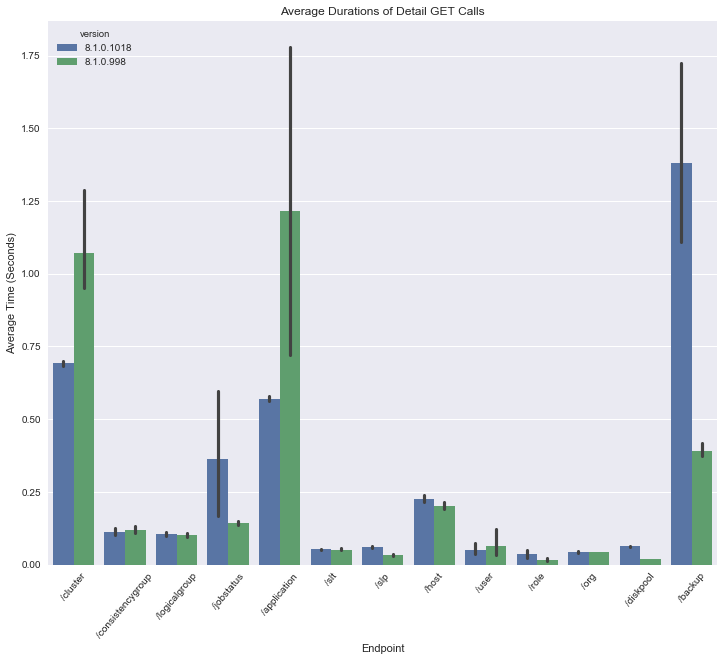

In [150]:
fig, ax = plt.subplots(figsize=(12, 10))
detail_df = get_times_for_all_executions(df=executions_df, call_type='detail')
detail_version_df = groupby_version(detail_df, new_vers, second_vers)
sns.barplot(x="endpoint", y="time", data=detail_version_df, hue='version')
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Average Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Average Durations of Detail GET Calls')

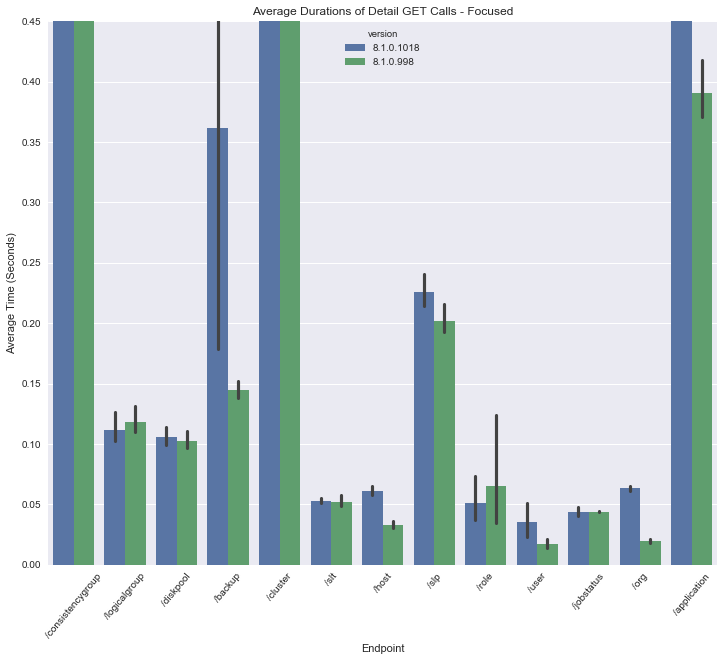

In [151]:
fig, ax = plt.subplots(figsize=(12, 10))
detail_df = get_times_for_all_executions(df = executions_df, call_type='detail')
detail_version_df = groupby_version(detail_df, new_vers, second_vers)
sns.barplot(x="endpoint", y="time", data=detail_version_df, hue='version')
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = ax.set_xticklabels(set(detail_df.endpoint), rotation=50)
_ = plt.ylim(0, 0.45)
_ = plt.ylabel('Average Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Average Durations of Detail GET Calls - Focused')

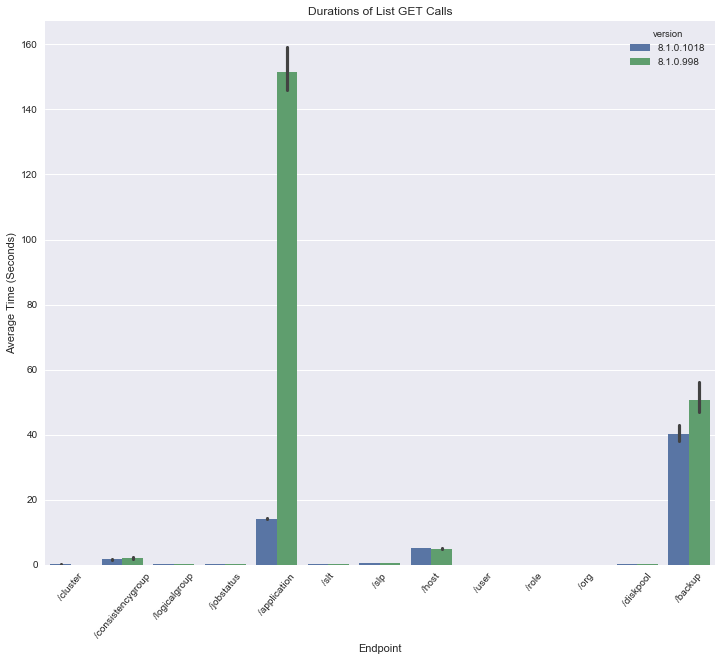

In [152]:
fig, ax = plt.subplots(figsize=(12, 10))
list_df = get_times_for_all_executions(df=executions_df, call_type='list')
list_version_df = groupby_version(list_df, new_vers, second_vers)
sns.barplot(x="endpoint", y="time", data=list_version_df, hue='version')
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Average Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Durations of List GET Calls')

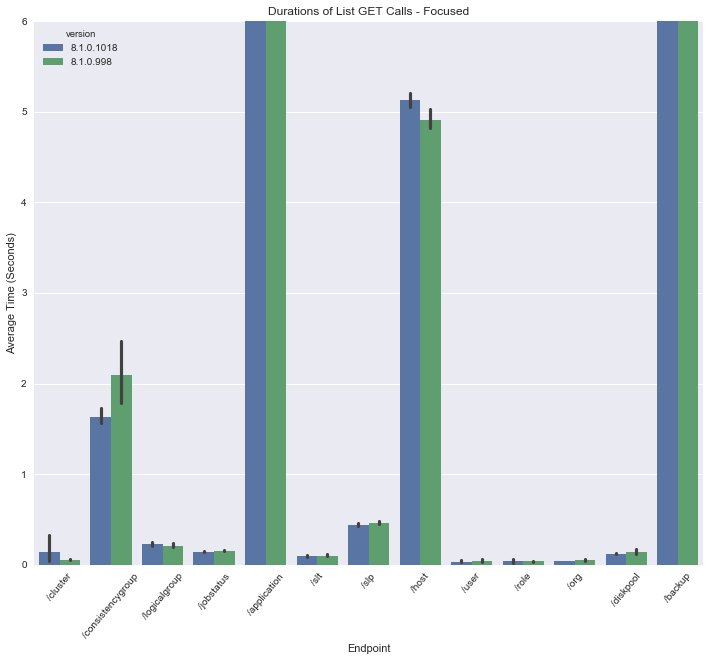

In [153]:
fig, ax = plt.subplots(figsize=(12, 10))
list_df = get_times_for_all_executions(df= executions_df, call_type='list')
list_version_df = groupby_version(list_df, new_vers, second_vers)
sns.barplot(x="endpoint", y="time", data=list_version_df, hue='version')
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = plt.ylim(0, 6)
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Average Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Durations of List GET Calls - Focused')

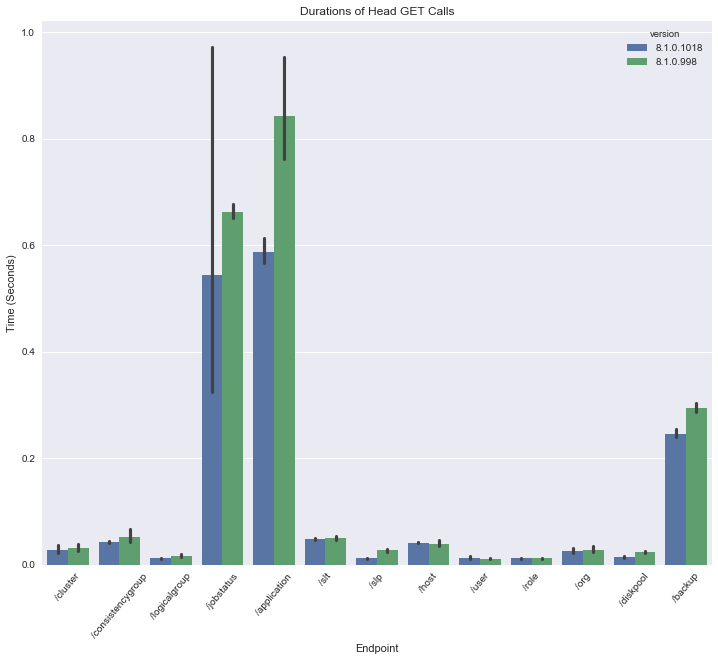

In [154]:
fig, ax = plt.subplots(figsize=(12, 10))
head_df = get_times_for_all_executions(df=executions_df, call_type='head')
head_version_df = groupby_version(head_df, new_vers, second_vers)
sns.barplot(x="endpoint", y="time", data=head_version_df, hue='version')
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Durations of Head GET Calls')

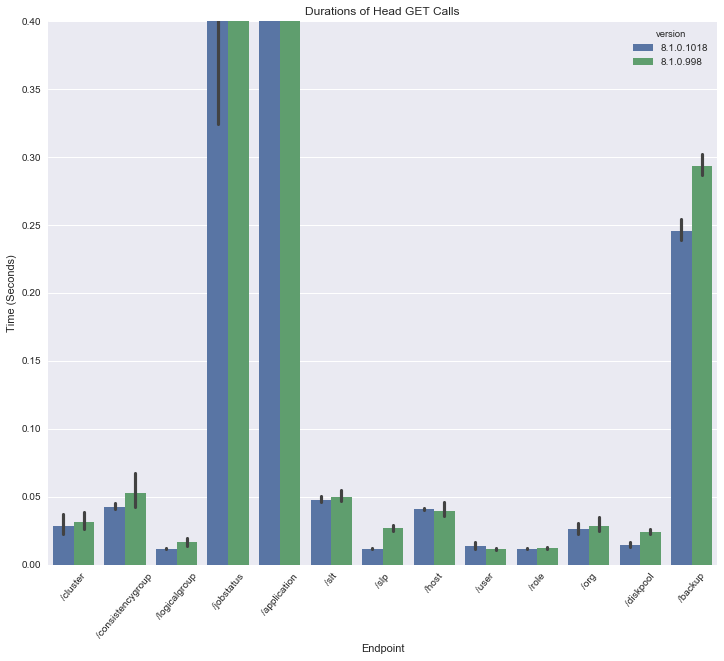

In [155]:
fig, ax = plt.subplots(figsize=(12, 10))
head_df = get_times_for_all_executions(df=executions_df, call_type='head')
head_version_df = groupby_version(head_df, new_vers, second_vers)
sns.barplot(x="endpoint", y="time", data=head_version_df, hue='version')
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = plt.xticks(rotation=50)
_ = plt.ylim(0, 0.4)
_ = plt.ylabel('Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Durations of Head GET Calls')

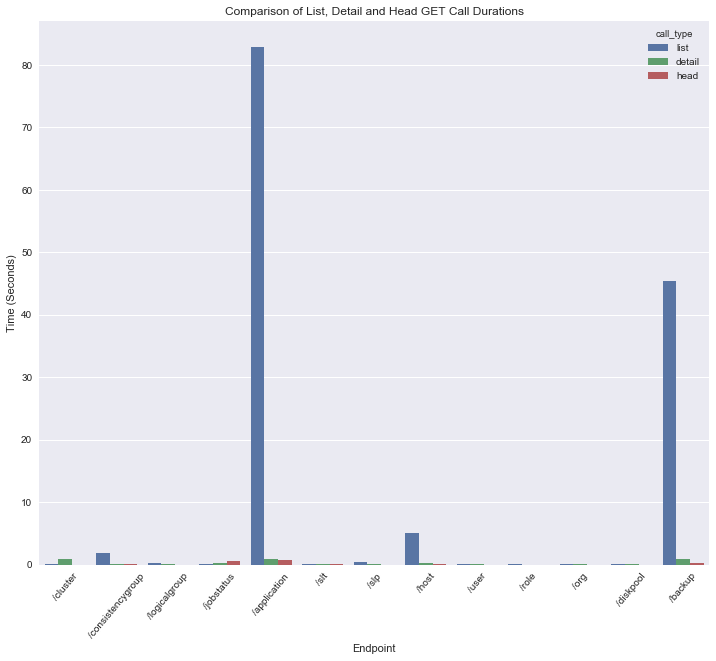

In [143]:
#Changes the figure size of the output graph
full_df = combine(executions_df)
fig, ax = plt.subplots(figsize=(12, 10))
g = sns.barplot(x="endpoint", y="time", hue="call_type", data=full_df, ci=None)
#Limits the y axis to make the details of more bar graphs relevent
#plt.ylim(0, 2)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = plt.xticks(rotation=50)
_ = plt.ylabel('Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Comparison of List, Detail and Head GET Call Durations')

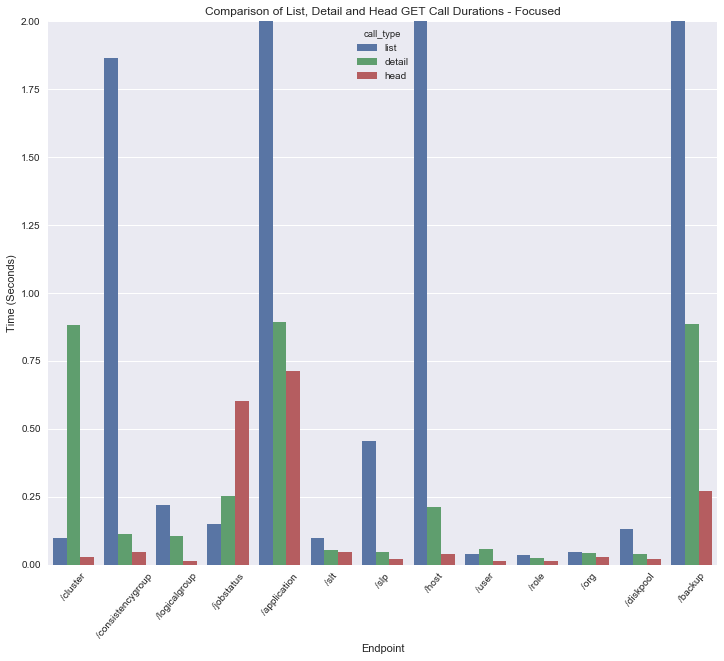

In [156]:
#Changes the figure size of the output graph
full_df = combine(executions_df)
fig, ax = plt.subplots(figsize=(12, 10))
g = sns.barplot(x="endpoint", y="time", hue="call_type", data=full_df, ci=None)
#Limits the y axis to make the details of more bar graphs relevent
#plt.ylim(0, 2)
# get current axis
ax = plt.gca()
# get current xtick labels
xticks = ax.get_xticks()
# convert all xtick labels to selected format from ms timestamp
_ = plt.xticks(rotation=50)
_ = plt.ylim(0, 2)
_ = plt.ylabel('Time (Seconds)')
_ = plt.xlabel('Endpoint')
_ = plt.title('Comparison of List, Detail and Head GET Call Durations - Focused')

In [36]:
#This is the command to convert agm_api_calls.ipynb to a pdf with the hidecode template
#jupyter nbconvert --to pdf agm_api_calls.ipynb --template hidecode.tpl

#You will definitely need latex of some kind
#Maybe pandocs?